<a href="https://www.kaggle.com/code/khushalupadhayay/amazon-food-review-sentiment-analysis?scriptVersionId=253735633" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import nltk 
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [3]:
df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
df = df.head(500)

In [4]:
df.shape

(500, 10)

In [5]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


# so here the data says 
| Column Name                | Description                                                     |
| -------------------------- | --------------------------------------------------------------- |
| **Id**                     | Unique identifier for each review entry                         |
| **ProductId**              | Unique identifier for the product being reviewed                |
| **UserId**                 | Unique identifier for the user who wrote the review             |
| **ProfileName**            | The display name or profile name of the user                    |
| **HelpfulnessNumerator**   | Number of users who found the review helpful                    |
| **HelpfulnessDenominator** | Number of users who rated whether the review was helpful or not |
| **Score**                  | The star rating given by the user (usually 1 to 5)              |
| **Time**                   | Timestamp of the review submission (in Unix epoch time)         |
| **Summary**                | A short summary or title of the review                          |
| **Text**                   | The full text content of the review                             |


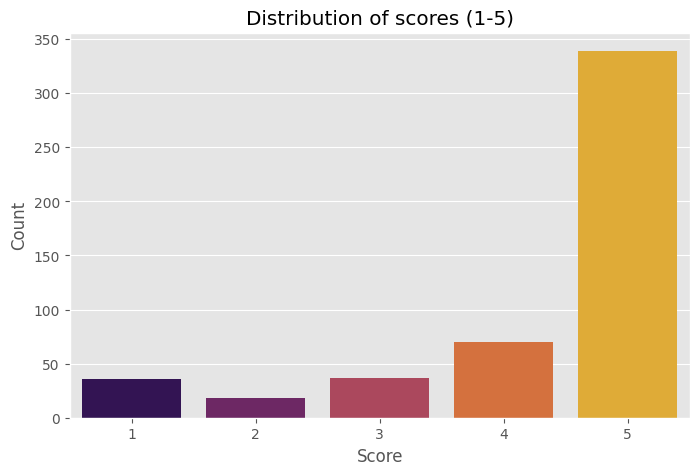

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Score', palette='inferno')
plt.title('Distribution of scores (1-5)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


In [8]:
positive_words = " ".join(df[df['Score'] > 3]['Summary'])
negative_words = " ".join(df[df['Score'] < 3]['Summary'])

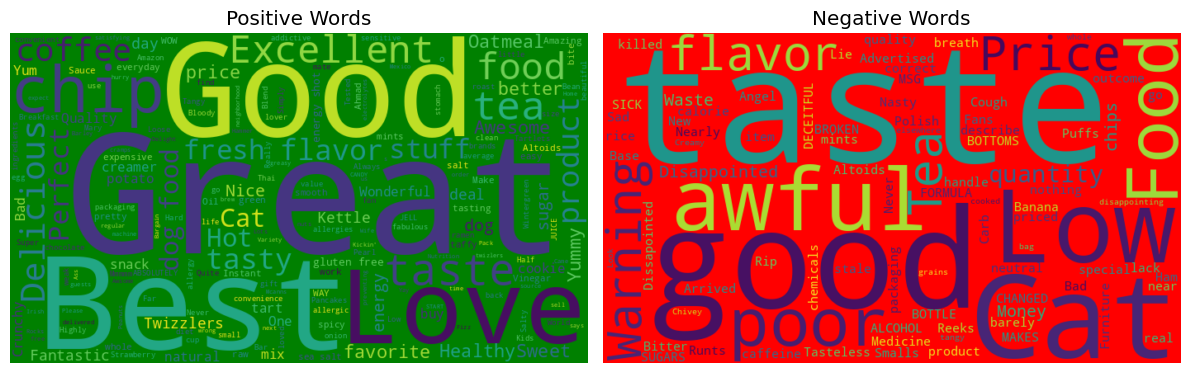

In [9]:
from wordcloud import WordCloud
Pos = WordCloud(width = 700, height = 400, background_color = 'green').generate(positive_words)
Neg = WordCloud(width = 700, height = 400, background_color = 'red').generate(negative_words)

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.imshow(Pos, interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive Words')

plt.subplot(1,2,2)
plt.imshow(Neg, interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative Words')

plt.tight_layout()
plt.show()


In [10]:
ex = df["Text"][50]
print(ex)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [11]:
tokens = nltk.word_tokenize(ex)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [12]:
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER Sentiment Scoring

In [14]:
 from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores('worst quality ever')

{'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}

In [16]:
res = {}
for i , row in tqdm(df.iterrows(),total=len(df)):
    text = row["Text"]
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={"index":"Id"})
vaders = vaders.merge(df, how='left')

In [18]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Now plotting VADER Results

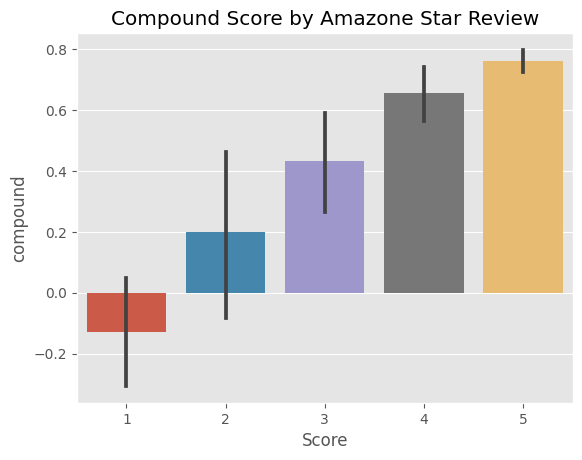

In [19]:
ax = sns.barplot(data = vaders,x="Score",y="compound")
ax.set_title("Compound Score by Amazone Star Review")
plt.show()

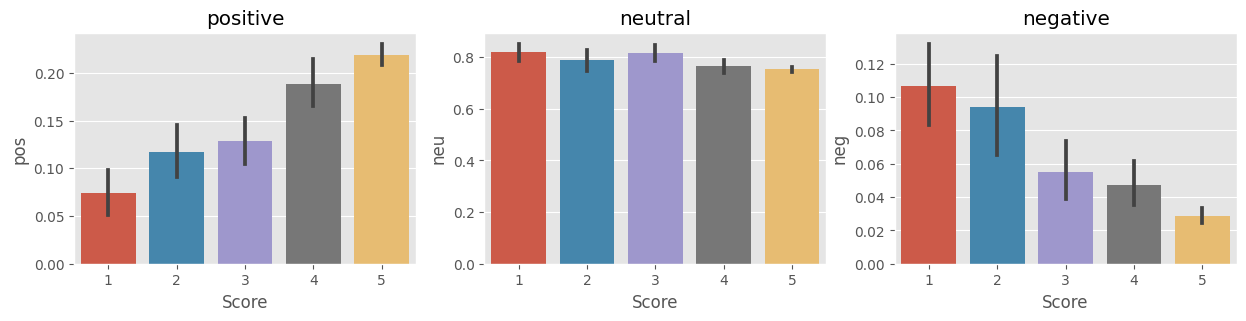

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.barplot(data= vaders,x="Score",y="pos",ax=axs[0])
sns.barplot(data= vaders,x="Score",y="neu",ax=axs[1])
sns.barplot(data= vaders,x="Score",y="neg",ax=axs[2])
axs[0].set_title("positive")
axs[1].set_title("neutral")
axs[2].set_title("negative")

plt.show()

## Roberta Pretrained Model

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL  = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

2025-08-01 20:03:06.990145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754078587.313745      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754078587.417813      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [23]:
print(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [24]:
# Run For Roberta Model
def polarity_scores_roberta(ex):
    
    encoded_text = tokenizer(ex,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg" : scores[0],
        "roberta_neu" : scores[1],
        "roberta_pos" : scores[2]
}
    return scores_dict

In [25]:
res = {}
for i , row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row["Text"]
        myid = row["Id"]
        vader_results = sia.polarity_scores(text)
        vader_results_rename = {}
        for key , value in vader_results.items():
            vader_results_rename[f"vader_{key}"] = value
        
        roberta_results = polarity_scores_roberta(text)
        both = {**vader_results_rename, **roberta_results}
        res[myid] = both
    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Broke for id 83
Broke for id 187


In [26]:
both


{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.0024397594,
 'roberta_neu': 0.011327237,
 'roberta_pos': 0.986233}

In [27]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={"index":"Id"})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [28]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

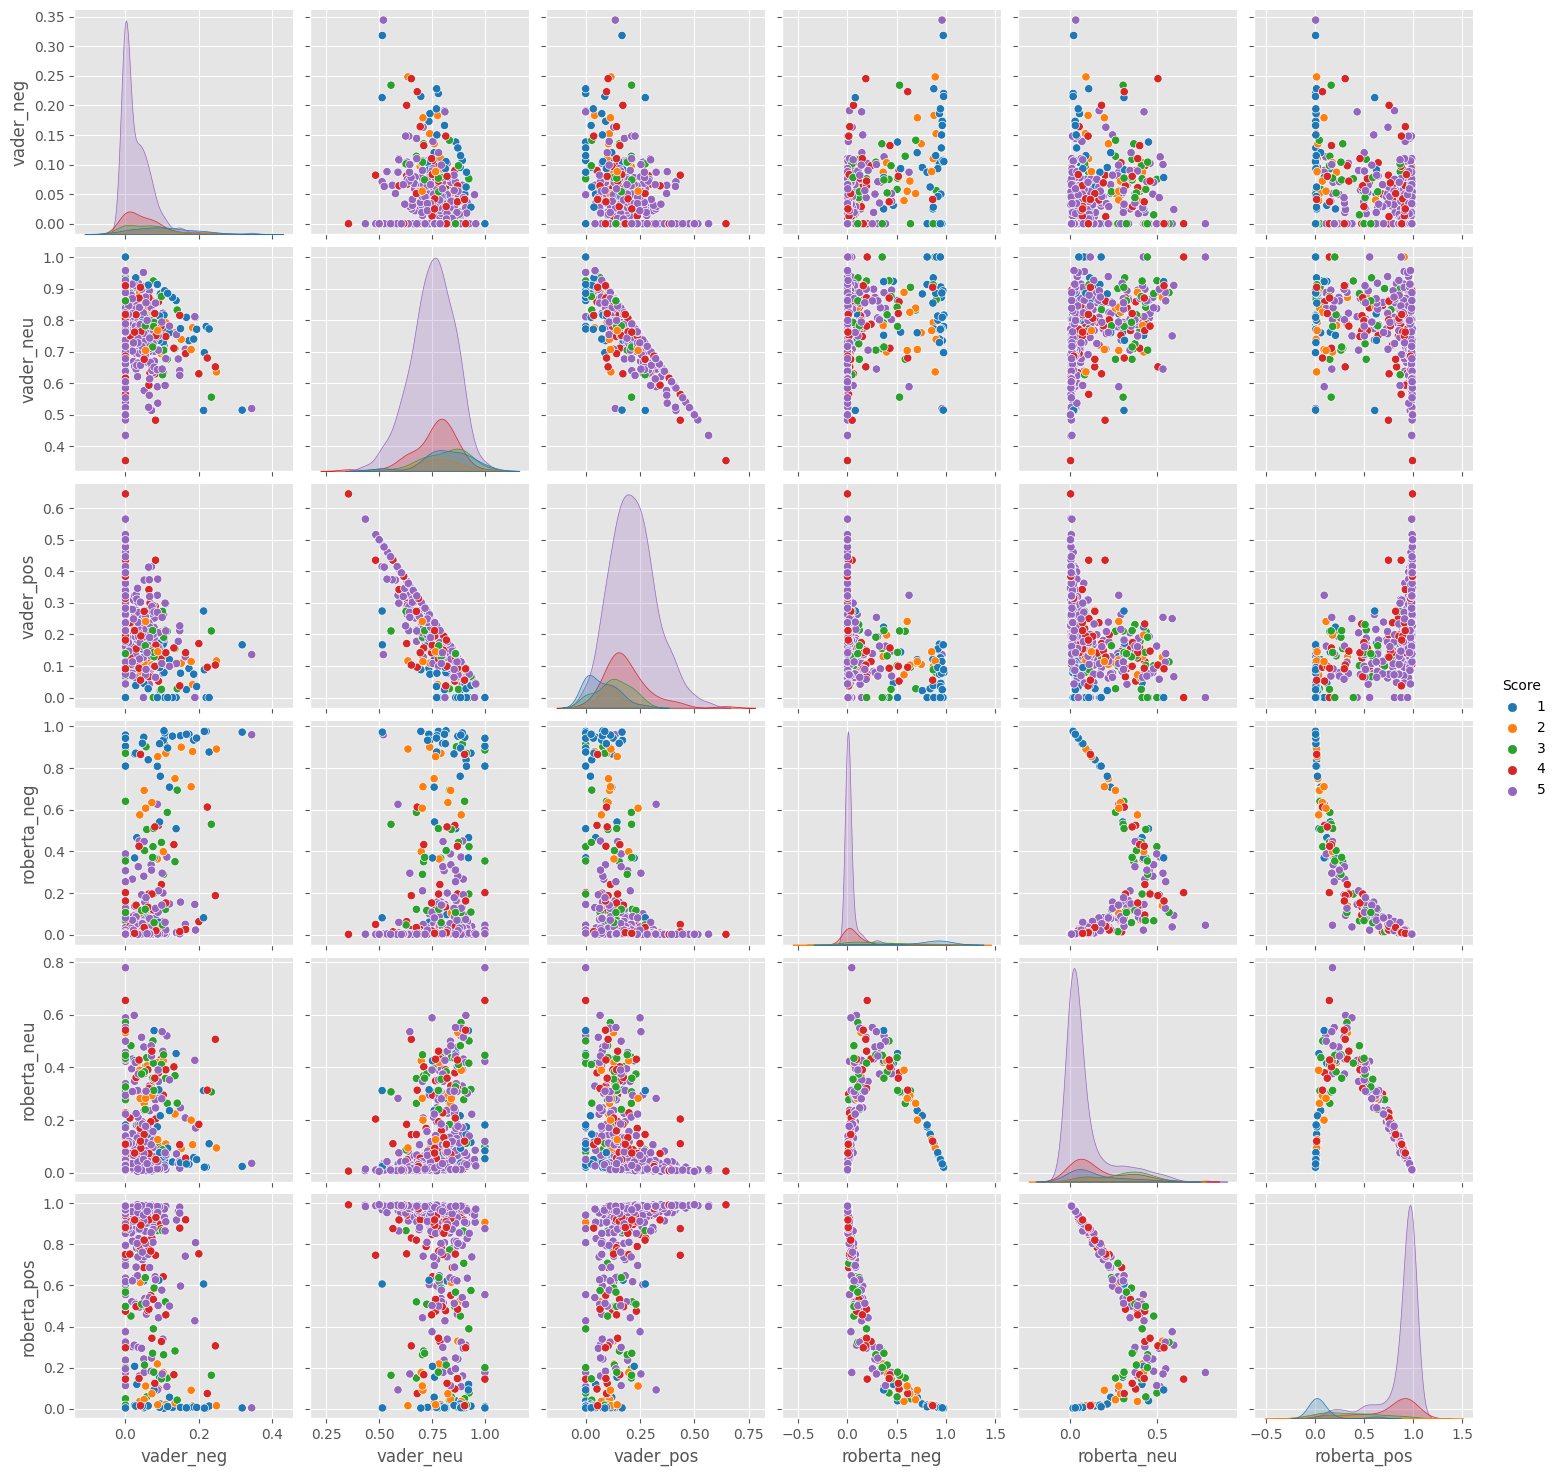

In [29]:
sns.pairplot(data=results_df,
            vars=['vader_neg', 'vader_neu', 'vader_pos',
                'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue="Score",
            palette="tab10")
plt.show()

In [30]:
results_df.query("Score  == 1").sort_values("roberta_pos",ascending = False)["Text"].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

# Example test sentences

In [31]:
test_sentences = [
    "I absolutely love this product! It works wonders.",
    "This is the worst purchase I have ever made.",
    "It's okay, but not great.",
    "The packaging was nice, but the food was stale.",
    "I'm so happy with this service!",
    "Boooo",
    "I don't like it at all.",
    "Service was quick and friendly.",
    "The price is too high for what you get.",
    "Simply the best experience ever."
]

print("Testing VADER and RoBERTa sentiment analysis:")
for sentence in test_sentences:
    # VADER
    vader_result = sia.polarity_scores(sentence)
    # RoBERTa
    encoded_text = tokenizer(sentence, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    from scipy.special import softmax
    scores = softmax(scores)
    roberta_result = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    print(f"\nSentence: {sentence}")
    print(f"VADER:     {vader_result}")
    print(f"RoBERTa:   {roberta_result}")


Testing VADER and RoBERTa sentiment analysis:

Sentence: I absolutely love this product! It works wonders.
VADER:     {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6989}
RoBERTa:   {'roberta_neg': 0.0021389837, 'roberta_neu': 0.0061073597, 'roberta_pos': 0.9917536}

Sentence: This is the worst purchase I have ever made.
VADER:     {'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}
RoBERTa:   {'roberta_neg': 0.97902876, 'roberta_neu': 0.018586228, 'roberta_pos': 0.0023850165}

Sentence: It's okay, but not great.
VADER:     {'neg': 0.499, 'neu': 0.337, 'pos': 0.163, 'compound': -0.6112}
RoBERTa:   {'roberta_neg': 0.46005476, 'roberta_neu': 0.42622316, 'roberta_pos': 0.1137221}

Sentence: The packaging was nice, but the food was stale.
VADER:     {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.2263}
RoBERTa:   {'roberta_neg': 0.46259674, 'roberta_neu': 0.39244175, 'roberta_pos': 0.14496149}

Sentence: I'm so happy with this service!
VADER:     {'neg': 0.0, 'neu'